In [1]:
%matplotlib notebook

# Color_map plots

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import My_functions_v2 as my

### Find interesting periodes

In [3]:
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_and_omni.pkl')

<IPython.core.display.Javascript object>


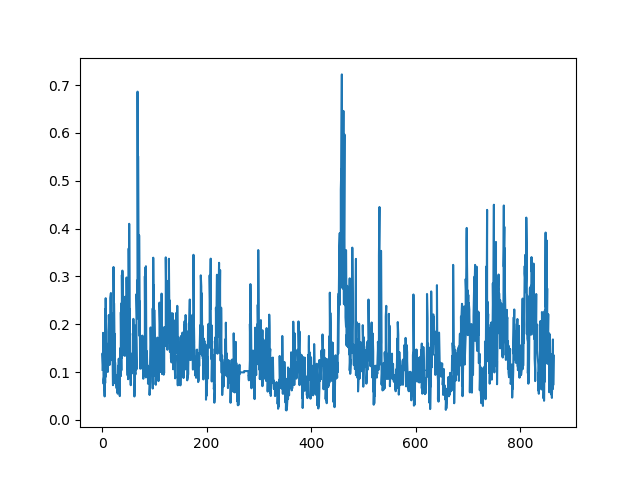

In [4]:
plt.figure()

plt.plot(Half_orbit.Orbit_nr,Half_orbit.FAC)


<IPython.core.display.Javascript object>


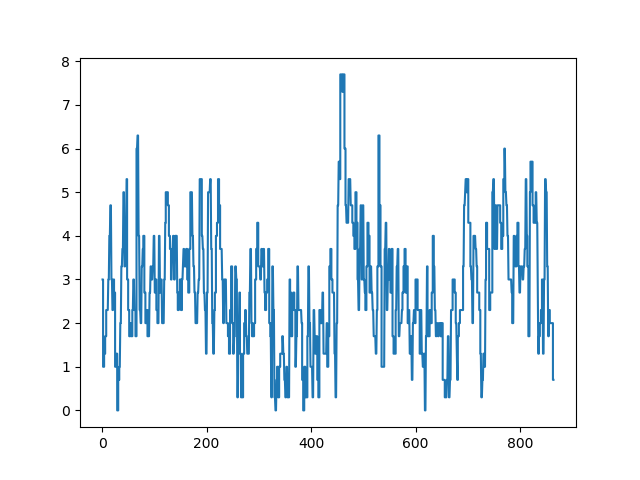

In [5]:
plt.figure()

plt.plot(Half_orbit.Orbit_nr,Half_orbit.Kp)

In [6]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')

## DNS density plot

In [7]:
lat = 'mLatitude'

In [8]:
my.add_apex_coords(DNS,date = 'none', h = 450)
my.add_heading(DNS, latitude = lat )
# add pOrbit which is a orbit nr. that changes increment with 0.5 for each pole passages
DNS.loc[:,'pOrbit_nr'] = np.cumsum(np.append(0, abs(np.diff(DNS.N_heading.values))))/4

In [9]:
#Crate the matrix for imshow()

# The start time and number of orbits to be plotted
start_time = '2015-03-15-02'
N = 61
# get the start orbit
start_orbit = DNS[start_time].pOrbit_nr[0]
# Create the Y index'ex
fig_index1 = np.arange(-90,90,0.5)
fig_index2 = np.arange(90,-90.5,-0.5)
fig_index = np.hstack([fig_index1,fig_index2])
# Initialize for x indexes
fig_dates = np.empty(N, dtype='datetime64[s]')
fig_orbit = np.zeros(N)

# Initilaize matriz for the densiteis
fig_values = np.zeros([len(fig_index),len(fig_orbit)])

for i in range(N):
    # Get the densiteis for (start_orbit+i) orbit and make sure that data_column1 is the N heading part
    # and data_column2 is the south heading part.
    data_column1= DNS[abs(DNS.pOrbit_nr-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = DNS[abs(DNS.pOrbit_nr-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= DNS[abs(DNS.pOrbit_nr-(start_orbit+i+0.5))<0.01]
        data_column2 = DNS[abs(DNS.pOrbit_nr-(start_orbit+i+1))<0.01]
    
    # Store the orbti nr. and the start time of the orbit to create x-axis later
    fig_orbit[i] = data_column1.Orbit_nr[0]
    fig_dates[i] = np.datetime64(data_column1.index[0])
    # Set index to Latitude 
    data_column1 = data_column1.set_index(lat)
    data_column2 = data_column2.set_index(lat)
    # interpolate the Densities to the Latitude given by fig_index
    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).Density.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).Density.values
    # store the values in matrix
    fig_values[:,i] = np.hstack([data_column1,data_column2])
fig_dates = pd.to_datetime(fig_dates) 

<IPython.core.display.Javascript object>


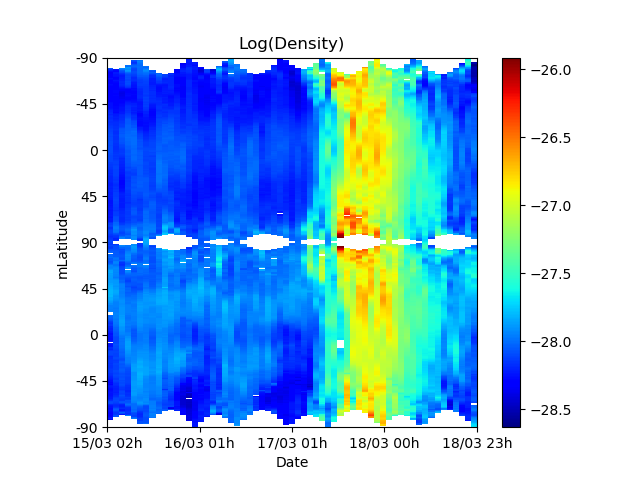

Text(0.5,1,'Log(Density)')

In [10]:
plt.figure()

# Formate the dates to a string
fig_date_str = fig_dates.strftime('%d/%m %Hh')

# Plot the data
plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], aspect='equal', origin='lower',
           cmap='jet')
plt.colorbar()
#plt.axis(aspect='image')

# Set the ticks and labels...

#x_ticks = (fig_orbit[::10]-fig_orbit[0])/max(fig_orbit[::10]-fig_orbit[0])*5
#x_labels = fig_orbit[::10].astype('int')

# Create x labes
x_labels = fig_date_str[::15]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%15)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

# Create y labes
y_labels = [-90,-45,0,45,90,45,0,-45,-90]
y_ticks = np.linspace(0,5,len(y_labels))
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('Log(Density)')


## FAC

In [11]:
FAC.loc[:,'FAC_roll']  = abs(FAC.FAC).rolling('20s').mean().values

In [12]:
my.add_apex_coords(FAC,date = 'none', h = 450)
my.add_heading(FAC, latitude = lat)
FAC.loc[:,'pOrbit_nr']  = np.cumsum(np.append(0, abs(np.diff(FAC.N_heading.values))))/4


In [26]:
orbit = 'pOrbit_nr'
abs(FAC.loc[:,orbit].values-50)<0.01

array([False, False, False, ..., False, False, False], dtype=bool)

In [13]:
start_time = '2015-03-15-02'
N = 61
min_lat = 30

start_orbit = FAC[start_time].pOrbit_nr[0]

fig_index1 = np.hstack([np.arange(-90,-min_lat,0.01),0, np.arange(min_lat,90,0.01)])
fig_index2 = np.hstack([np.arange(90,min_lat,-0.01),0, np.arange(-min_lat,-90,-0.01)])
fig_index = np.hstack([fig_index1,fig_index2])

fig_dates = np.empty(N, dtype='datetime64[s]')
fig_orbit = np.zeros(N)

f_fig_values = np.zeros([len(fig_index),N])

for i in range(N):
    data_column1= FAC[abs(FAC.pOrbit_nr-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = FAC[abs(FAC.pOrbit_nr-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= FAC[abs(FAC.pOrbit_nr-(start_orbit+i+0.5))<0.01]
        data_column2 = FAC[abs(FAC.pOrbit_nr-(start_orbit+i+1))<0.01]
    
    fig_orbit[i] = data_column1.Orbit_nr[0]
    fig_dates[i] = np.datetime64(data_column1.index[0])
    
    data_column1 = data_column1.set_index(lat)
    data_column2 = data_column2.set_index(lat)

    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).FAC_roll.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).FAC_roll.values

    f_fig_values[:,i] = np.hstack([data_column1,data_column2])
fig_dates = pd.to_datetime(fig_dates) 

<IPython.core.display.Javascript object>


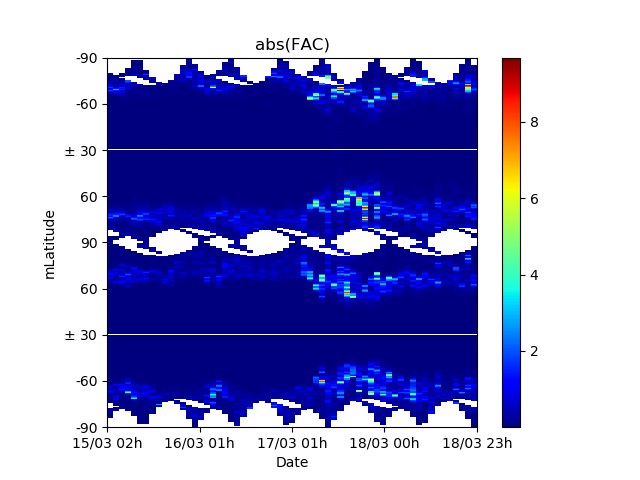

Text(0.5,1,'abs(FAC)')

In [14]:
plt.figure()

fig_date_str = fig_dates.strftime('%d/%m %Hh')

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
plt.colorbar()

# Set the ticks and labels...

#x_ticks = (fig_orbit[::10]-fig_orbit[0])/max(fig_orbit[::10]-fig_orbit[0])*5
#x_labels = fig_orbit[::10].astype('int')

x_labels = fig_date_str[::15]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%15)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-60,'$\pm$ 30',60,90,60,'$\pm$ 30',-60,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('abs(FAC)')

<IPython.core.display.Javascript object>


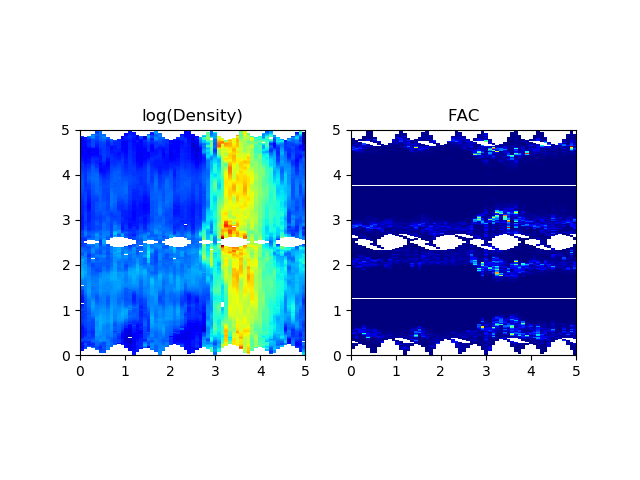

Text(0.5,1,'FAC')

In [15]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('log(Density)')

plt.subplot(1, 2, 2)

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('FAC')

## Second storm 

In [16]:
start_time = '2015-01-05-06'
N = 51

start_orbit = DNS[start_time].pOrbit_nr[0]

fig_index1 = np.arange(-90,90,0.5)
fig_index2 = np.arange(90,-90.5,-0.5)
fig_index = np.hstack([fig_index1,fig_index2])

fig_dates = np.empty(N, dtype='datetime64[s]')
fig_orbit = np.zeros(N)

fig_values = np.zeros([len(fig_index),len(fig_orbit)])

for i in range(N):
    data_column1= DNS[abs(DNS.pOrbit_nr-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = DNS[abs(DNS.pOrbit_nr-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= DNS[abs(DNS.pOrbit_nr-(start_orbit+i+0.5))<0.01]
        data_column2 = DNS[abs(DNS.pOrbit_nr-(start_orbit+i+1))<0.01]
    
    fig_orbit[i] = data_column1.Orbit_nr[0]
    fig_dates[i] = np.datetime64(data_column1.index[0])

    data_column1 = data_column1.set_index(lat)
    data_column2 = data_column2.set_index(lat)

    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).Density.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).Density.values

    fig_values[:,i] = np.hstack([data_column1,data_column2])
fig_dates = pd.to_datetime(fig_dates) 

<IPython.core.display.Javascript object>


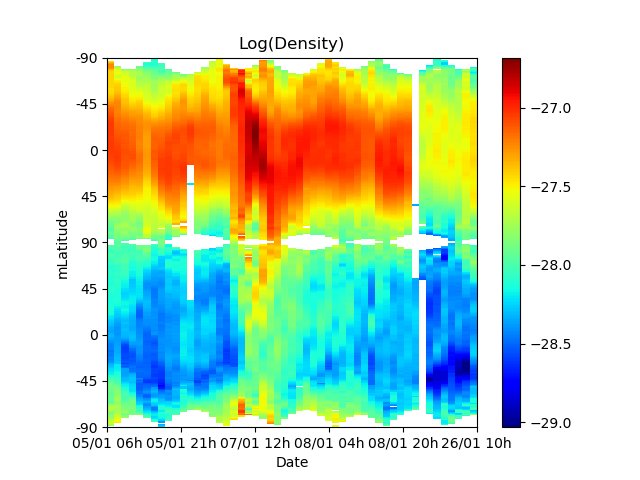

Text(0.5,1,'Log(Density)')

In [17]:
plt.figure()

fig_date_str = fig_dates.strftime('%d/%m %Hh')

plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], aspect='equal', origin='lower',
           cmap='jet')
plt.colorbar()
#plt.axis(aspect='image')

# Set the ticks and labels...

#x_ticks = (fig_orbit[::10]-fig_orbit[0])/max(fig_orbit[::10]-fig_orbit[0])*5
#x_labels = fig_orbit[::10].astype('int')

x_labels = fig_date_str[::10]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%10)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

y_labels = [-90,-45,0,45,90,45,0,-45,-90]
y_ticks = np.linspace(0,5,len(y_labels))
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('Log(Density)')


In [18]:
start_time = '2015-01-05-06'
N = 51
min_lat = 30

start_orbit = FAC[start_time].pOrbit_nr[0]

fig_index1 = np.hstack([np.arange(-90,-min_lat,0.01),0, np.arange(min_lat,90,0.01)])
fig_index2 = np.hstack([np.arange(90,min_lat,-0.01),0, np.arange(-min_lat,-90,-0.01)])
fig_index = np.hstack([fig_index1,fig_index2])

fig_dates = np.empty(N, dtype='datetime64[s]')
fig_orbit = np.zeros(N)

f_fig_values = np.zeros([len(fig_index),N])

for i in range(N):
    data_column1= FAC[abs(FAC.pOrbit_nr-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = FAC[abs(FAC.pOrbit_nr-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= FAC[abs(FAC.pOrbit_nr-(start_orbit+i+0.5))<0.01]
        data_column2 = FAC[abs(FAC.pOrbit_nr-(start_orbit+i+1))<0.01]
    
    fig_orbit[i] = data_column1.Orbit_nr[0]
    fig_dates[i] = np.datetime64(data_column1.index[0])
    
    data_column1 = data_column1.set_index(lat)
    data_column2 = data_column2.set_index(lat)

    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).FAC_roll.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).FAC_roll.values

    f_fig_values[:,i] = np.hstack([data_column1,data_column2])
fig_dates = pd.to_datetime(fig_dates) 

<IPython.core.display.Javascript object>


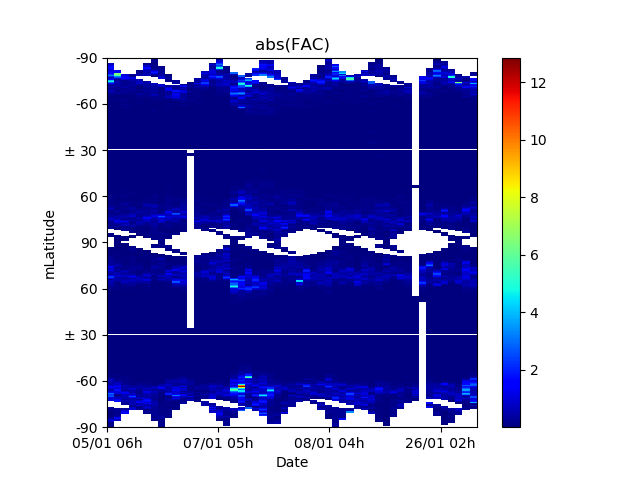

Text(0.5,1,'abs(FAC)')

In [19]:
plt.figure()

fig_date_str = fig_dates.strftime('%d/%m %Hh')

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
plt.colorbar()

# Set the ticks and labels...

#x_ticks = (fig_orbit[::10]-fig_orbit[0])/max(fig_orbit[::10]-fig_orbit[0])*5
#x_labels = fig_orbit[::10].astype('int')

x_labels = fig_date_str[::15]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%15)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-60,'$\pm$ 30',60,90,60,'$\pm$ 30',-60,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel(lat)


plt.title('abs(FAC)')

<IPython.core.display.Javascript object>


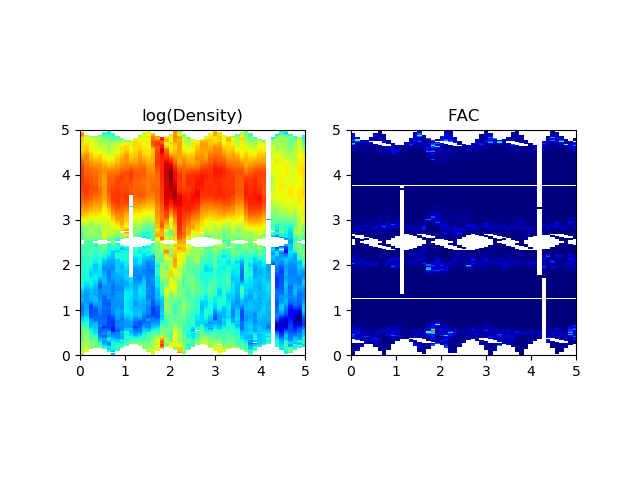

Text(0.5,1,'FAC')

In [20]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('log(Density)')

plt.subplot(1, 2, 2)

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('FAC')

# Color_map function test

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import My_functions_v2 as my

In [2]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')

In [3]:
DNS_Z,DNS_index,DNS_dates,DNS_orbit = my.Color_map(DNS,'2015-03-15-02',61,'mLatitude')

Text(0.5,1,'Log(Density)')

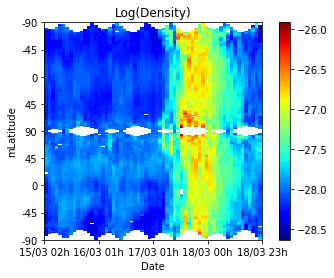

In [5]:
plt.figure()

# Formate the dates to a string
fig_date_str = DNS_dates.strftime('%d/%m %Hh')

# Plot the data
plt.imshow(np.log(DNS_Z), extent=[0, 5, 0, 5], aspect='equal', origin='lower',
           cmap='jet')
plt.colorbar()

# Set the ticks and labels...
# Create x labes
x_labels = fig_date_str[::15]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%15)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

# Create y labes
y_labels = [-90,-45,0,45,90,45,0,-45,-90]
y_ticks = np.linspace(0,5,len(y_labels))
plt.yticks(y_ticks, y_labels)
plt.ylabel('mLatitude')


plt.title('Log(Density)')

In [6]:
FAC_Z,FAC_index,FAC_dates,FAC_orbit = my.Color_map(FAC,'2015-03-15-02',61,'Latitude',30,'20s')

Text(0.5,1,'abs(FAC)')

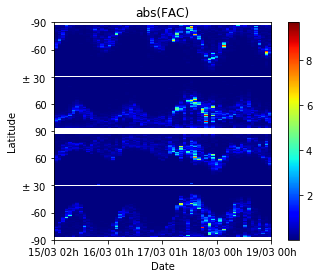

In [7]:
plt.figure()

fig_date_str = FAC_dates.strftime('%d/%m %Hh')

plt.imshow(FAC_Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
plt.colorbar()

# Set the ticks and labels...
x_labels = fig_date_str[::15]
x_ticks = np.linspace(0,5-((len(fig_date_str)-1)%15)/len(fig_date_str)*5,len(x_labels))
plt.xticks(x_ticks, x_labels)
plt.xlabel('Date')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-60,'$\pm$ 30',60,90,60,'$\pm$ 30',-60,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel('Latitude')


plt.title('abs(FAC)')